In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the input data to fit the CNN input shape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Save the model
model.save('handwriting_model.h5')


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.1459 - accuracy: 0.9553 - val_loss: 0.0516 - val_accuracy: 0.9837
Epoch 2/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.0431 - val_accuracy: 0.9868
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0428 - val_accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0255 - accuracy: 0.9916 - val_loss: 0.0321 - val_accuracy: 0.9891
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.0285 - val_accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0302 - val_accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 58s

1/1 [==============================] - 0s 255ms/step


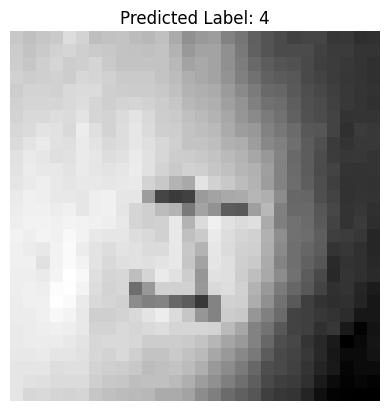

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the saved model
model = tf.keras.models.load_model('handwriting_model.h5')

# Load the handwritten image
image_path = 'sample.jpg'
image = Image.open(image_path).convert('L')  # Convert to grayscale
image = image.resize((28, 28))  # Resize to 28x28 pixels
image = np.array(image)
image = image / 255.0  # Normalize pixel values

# Reshape and expand dimensions of the image
new_image = np.expand_dims(image, axis=0)
new_image = np.expand_dims(new_image, axis=3)

# Make predictions on the new handwritten image
predictions = model.predict(new_image)
predicted_label = np.argmax(predictions)

# Display the new handwritten image and predicted label
plt.imshow(image, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
